<a href="https://colab.research.google.com/github/Natali-bali/TensorFlow_Tutorial/blob/master/04_Transfer_learning_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer learning fine tuning
In this project we use food dataset (10 classes) and pretrained on imagenet models. We use new technics as:
- Functional API
- image_dataset_from_directory

*note* this notebook was created with Colab, path links can be different if you run it on Jupyter

### Imports

In [196]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

In [197]:
# Get helper functions from my GitHub account.
!wget 'https://raw.githubusercontent.com/Natali-bali/TensorFlow_Tutorial/master/helper_functions.py'

--2021-06-21 09:49:50--  https://raw.githubusercontent.com/Natali-bali/TensorFlow_Tutorial/master/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10447 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.20K  --.-KB/s    in 0s      

2021-06-21 09:49:51 (102 MB/s) - ‘helper_functions.py.1’ saved [10447/10447]



In [198]:
#Download Data(10% from food pictures)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

--2021-06-21 09:49:51--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   121MB/s    in 1.3s    

2021-06-21 09:49:52 (121 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [199]:
from helper_functions import unzip_file, plot_pictures, classes_names, walk_through_dir, plot_loss_curves, create_tf_board_callback, plot_confusion_matrix

In [200]:
unzip_file('/content/10_food_classes_10_percent.zip')

In [201]:
dir_name_10 = '/content/10_food_classes_10_percent'
dir_train_10 = '/content/10_food_classes_10_percent/train'
dir_test_10 = '/content/10_food_classes_10_percent/test'

### Inspect folders

In [202]:
walk_through_dir(dir_name_10)

There are 2 directories, 0 files in /content/10_food_classes_10_percent
There are 10 directories, 0 files in /content/10_food_classes_10_percent/train
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/chicken_curry
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/pizza
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/steak
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/sushi
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/fried_rice
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/grilled_salmon
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/chicken_wings
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/ramen
There are 0 directories, 75 files in /content/10_food_classes_10_percent/train/ice_cream
There are 0 directories, 75 files in /content/10_f

### Check classes names

In [203]:
classes_names = classes_names(dir_test_10)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


### Plot random pictures for each class

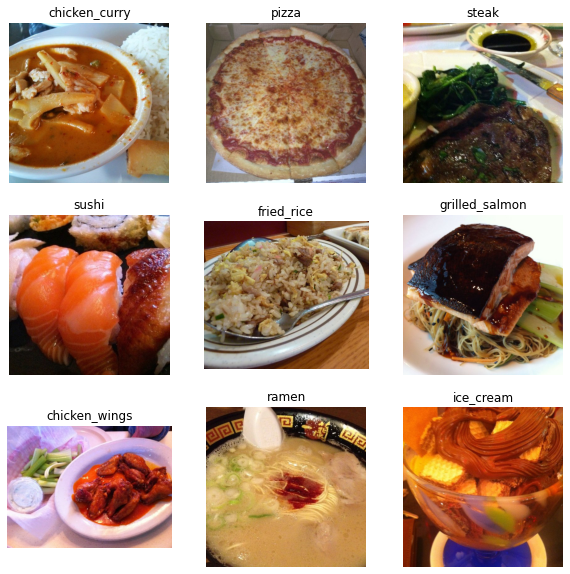

In [204]:
plot_pictures(dir_train_10)

### Image Dataset from directory
Now instead of ImageDataGenerator we will use new method
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

tf.keras.preprocessing.image_dataset_from_directory

In [205]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [206]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32

In [207]:
train_data_10 = image_dataset_from_directory(dir_train_10, 
                                          labels = 'inferred', 
                                          image_size = IMG_SIZE,
                                          batch_size = BATCH_SIZE,
                                          label_mode = 'categorical')
test_data = image_dataset_from_directory(dir_test_10, 
                                          labels = 'inferred', 
                                         image_size = IMG_SIZE,
                                          batch_size = BATCH_SIZE,
                                          label_mode = 'categorical')
#test data will always remain same

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [208]:
train_data_10
#It has different dimentions, None = batch size

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [209]:
len(train_data_10)

24

### Check classes(new option)

In [210]:
classes_names = train_data_10.class_names
classes_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

### See an example of batch data

In [211]:
#for images, labels in train_data_10.take(1):
  #for image, label in zip(images, labels):
    #print(image)

### Build first model_1 from applications tf.keras.applications.efficientnet.EfficientNetB0
We are not going to train this model, just check the predictions as it is (with 1000 classes from imagenet dataset)
  

In [212]:
K.clear_session()

In [213]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0, decode_predictions

In [214]:
model_1 = EfficientNetB0(include_top=True, weights='imagenet', input_tensor=None,
                          input_shape=None, pooling=None, classes=1000,
                          classifier_activation='softmax')

### Make predictions model_1

In [215]:
for images, labels in test_data.take(1):
  for image, label in zip(images, labels):
    pred = model_1.predict(tf.expand_dims(image, axis = 0))
    print('Predicted:', decode_predictions(pred, top=1)[0])
    print('Real:', classes_names[tf.argmax(np.array(label))])

Predicted: [('n07697313', 'cheeseburger', 0.9296347)]
Real: hamburger
Predicted: [('n07614500', 'ice_cream', 0.7965222)]
Real: ice_cream
Predicted: [('n07579787', 'plate', 0.21521343)]
Real: grilled_salmon
Predicted: [('n07880968', 'burrito', 0.4027954)]
Real: steak
Predicted: [('n07579787', 'plate', 0.5971441)]
Real: steak
Predicted: [('n07579787', 'plate', 0.3381536)]
Real: fried_rice
Predicted: [('n07711569', 'mashed_potato', 0.67803746)]
Real: sushi
Predicted: [('n04596742', 'wok', 0.44180536)]
Real: sushi
Predicted: [('n07711569', 'mashed_potato', 0.45703706)]
Real: grilled_salmon
Predicted: [('n07614500', 'ice_cream', 0.1212603)]
Real: ice_cream
Predicted: [('n07579787', 'plate', 0.3354861)]
Real: chicken_wings
Predicted: [('n07873807', 'pizza', 0.44800988)]
Real: pizza
Predicted: [('n07579787', 'plate', 0.77262574)]
Real: sushi
Predicted: [('n07579787', 'plate', 0.52778244)]
Real: grilled_salmon
Predicted: [('n07584110', 'consomme', 0.2984269)]
Real: ramen
Predicted: [('n0758411

### Build second model_2 
We will add extra layers GlobalAveragePooling2D (it extracts average weights and flatten output) and Dense layer with 10 classes as output layer)
I use functional API

In [216]:
K.clear_session()

In [217]:
base_model = EfficientNetB0(include_top=False)

In [218]:
# Freeze base_model layers, so they are not trainable
base_model.trainable = False

In [219]:
# Create inputs 
inputs = tf.keras.layers.Input(shape=(224,224,3), name = 'input_layer')

In [220]:
# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

In [221]:
#pass inputs to base model using functionl API
x = base_model(inputs)

In [222]:
print(x.shape)

(None, 7, 7, 1280)


In [223]:
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')(x)
x.shape

TensorShape([None, 1280])

In [224]:
#Add output layer
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output_layer')(x)

In [225]:
x.shape

TensorShape([None, 1280])

In [226]:
model_2 = tf.keras.Model(inputs, outputs)

In [227]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [228]:
history_2 = model_2.fit(train_data_10, epochs = 5, 
                        validation_data = test_data, 
                        steps_per_epoch=len(train_data_10), 
                        validation_steps=int(0.25*len(test_data))) 
#we use 25% test data for validation to speed up computing

Epoch 1/5
24/24 [==============================] - 12s 244ms/step - loss: 1.9223 - accuracy: 0.4080 - val_loss: 1.3574 - val_accuracy: 0.7105
Epoch 2/5
24/24 [==============================] - 5s 195ms/step - loss: 1.1494 - accuracy: 0.7493 - val_loss: 0.9212 - val_accuracy: 0.8141
Epoch 3/5
24/24 [==============================] - 5s 192ms/step - loss: 0.8502 - accuracy: 0.8120 - val_loss: 0.7389 - val_accuracy: 0.8289
Epoch 4/5
24/24 [==============================] - 5s 193ms/step - loss: 0.6823 - accuracy: 0.8307 - val_loss: 0.6552 - val_accuracy: 0.8487
Epoch 5/5
24/24 [==============================] - 5s 193ms/step - loss: 0.5930 - accuracy: 0.8653 - val_loss: 0.6062 - val_accuracy: 0.8569


### Evaluate model

In [229]:
result_2 = model_2.evaluate(test_data)
result_2

79/79 [==============================] - 9s 105ms/step - loss: 0.6083 - accuracy: 0.8412


[0.6082653999328613, 0.8411999940872192]

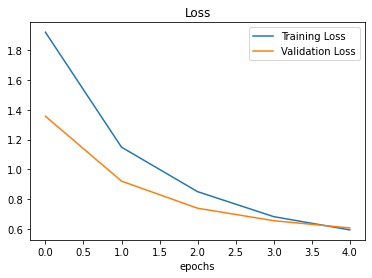

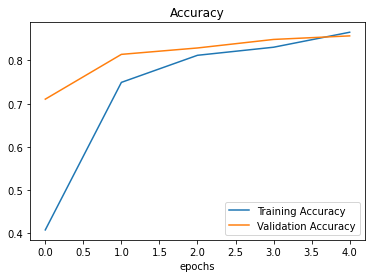

In [230]:
plot_loss_curves(history_2)

### Check our model arcitecture 

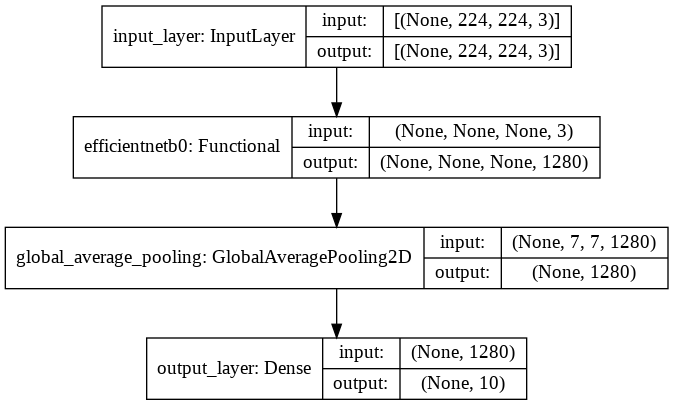

In [231]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, show_shapes=True)


In [232]:
for layer_num, layer in enumerate(base_model.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

### Check predictions

In [233]:
for images, labels in test_data.take(1):
  for image, label in zip(images, labels):
    pred = model_2.predict(tf.expand_dims(image, axis = 0))    
    print('Predicted:', classes_names[tf.argmax(pred[0])])
    print('Real:', classes_names[tf.argmax(np.array(label))])

Predicted: hamburger
Real: hamburger
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: sushi
Real: sushi
Predicted: pizza
Real: pizza
Predicted: pizza
Real: pizza
Predicted: ramen
Real: ramen
Predicted: hamburger
Real: hamburger
Predicted: chicken_wings
Real: hamburger
Predicted: hamburger
Real: hamburger
Predicted: hamburger
Real: hamburger
Predicted: hamburger
Real: hamburger
Predicted: fried_rice
Real: fried_rice
Predicted: sushi
Real: sushi
Predicted: ice_cream
Real: ice_cream
Predicted: steak
Real: steak
Predicted: hamburger
Real: hamburger
Predicted: chicken_curry
Real: chicken_curry
Predicted: ramen
Real: ramen
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: chicken_wings
Real: chicken_wings
Predicted: fried_rice
Real: fried_rice
Predicted: chicken_wings
Real: chicken_wings
Predicted: pizza
Real: pizza
Predicted: chicken_wings
Real: chicken_wings
Predicted: grilled_salmon
Real: grilled_salmon
Predicted: fried_rice
Real: fried_rice
Predicted: pizza
Real: pizza
P

In [234]:
model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


### Understanding GlobalAveragePooling2D layer

In [235]:
# Define input tensor shape (same number of dimensions as the output of efficientnetb0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


We can see the tf.keras.layers.GlobalAveragePooling2D() layer condensed the input tensor from shape (1, 4, 4, 3) to (1, 3). It did so by averaging the input_tensor across the middle two axes.


We can replicate this operation using the tf.reduce_mean() operation and specifying the appropriate axes.

Doing this not only makes the output of the base model compatible with the input shape requirement of our output layer (tf.keras.layers.Dense()), it also condenses the information found by the base model into a lower dimension feature vector.


🔑 Note: One of the reasons feature extraction transfer learning is named how it is is because what often happens is a pretrained model outputs a feature vector (a long tensor of numbers, in our case, this is the output of the tf.keras.layers.GlobalAveragePooling2D() layer) which can then be used to extract patterns out of.


🛠 Practice: Do the same as the above cell but for tf.keras.layers.GlobalMaxPool2D().

In [236]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [237]:
# Pass the random tensor through a global Max pooling 2D layer
global_max_pooled_tensor = tf.keras.layers.GlobalMaxPool2D()(input_tensor)
print(f"2D global max pooled random tensor:\n {global_max_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_max_pooled_tensor.shape}")

2D global max pooled random tensor:
 [[0.9058464 1.1603122 1.6994323]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


### Try model_3 with GlobalMaxPoll2D


In [238]:
inputs = tf.keras.layers.Input(shape = (224,224,3))
x = base_model(inputs)
x = tf.keras.layers.GlobalMaxPool2D(name = 'global_max_pool_2D')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax', name = 'output')(x)
model_3 = tf.keras.Model(inputs, outputs)

In [239]:
model_3.compile(optimizer='adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [240]:
history_3 = model_3.fit(train_data_10, epochs = 5, validation_data=test_data, steps_per_epoch=len(train_data_10), validation_steps=int(.25*len(test_data)))

Epoch 1/5
24/24 [==============================] - 11s 245ms/step - loss: 3.6300 - accuracy: 0.2600 - val_loss: 1.9416 - val_accuracy: 0.4770
Epoch 2/5
24/24 [==============================] - 5s 192ms/step - loss: 1.5092 - accuracy: 0.5973 - val_loss: 1.3642 - val_accuracy: 0.5938
Epoch 3/5
24/24 [==============================] - 5s 192ms/step - loss: 1.0273 - accuracy: 0.6987 - val_loss: 1.0681 - val_accuracy: 0.6826
Epoch 4/5
24/24 [==============================] - 5s 191ms/step - loss: 0.7475 - accuracy: 0.7840 - val_loss: 1.1862 - val_accuracy: 0.6628
Epoch 5/5
24/24 [==============================] - 5s 192ms/step - loss: 0.6323 - accuracy: 0.8053 - val_loss: 1.0307 - val_accuracy: 0.7171


In [241]:
result_3 = model_3.evaluate(test_data)
result_2, result_3

79/79 [==============================] - 9s 103ms/step - loss: 1.0277 - accuracy: 0.7124


([0.6082653999328613, 0.8411999940872192],
 [1.0276821851730347, 0.7124000191688538])

*GlobalAveragePooling2D performs better, so we keep it*

### Running a series of transfer learning experiments
We've seen the incredible results of transfer learning on 10% of the training data, what about 1% of the training data?


We will run the following modelling experiments:
- model_4: Use feature extraction transfer learning on 1% of the training data with data augmentation.
- model_5: Use feature extraction transfer learning on 10% of the training data with data augmentation.
- model_6: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
- model_7: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

While all of the experiments will be run on different versions of the training data, they will all be evaluated on the same test dataset, this ensures the results of each experiment are as comparable as possible.


All experiments will be done using the EfficientNetB0 model within the tf.keras.applications module.

To make sure we're keeping track of our experiments, we'll use our create_tensorboard_callback() function to log all of the model training logs.


We'll construct each model using the Keras Functional API and instead of implementing data augmentation in the ImageDataGenerator class as we have previously, we're going to build it right into the model using the tf.keras.layers.experimental.preprocessing module.

### Downloading and unzip 1% data

In [242]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2021-06-21 09:51:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.192.112, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.192.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.1’

10_food_classes_1_p 100%[===================>] 127.42M   224MB/s    in 0.6s    

2021-06-21 09:51:36 (224 MB/s) - ‘10_food_classes_1_percent.zip.1’ saved [133612354/133612354]



In [243]:
unzip_file('/content/10_food_classes_1_percent.zip')

### Inspect directories

In [244]:
walk_through_dir('/content/10_food_classes_1_percent')

There are 2 directories, 0 files in /content/10_food_classes_1_percent
There are 10 directories, 0 files in /content/10_food_classes_1_percent/train
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/chicken_curry
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/pizza
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/steak
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/sushi
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/fried_rice
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/grilled_salmon
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/chicken_wings
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/ramen
There are 0 directories, 7 files in /content/10_food_classes_1_percent/train/ice_cream
There are 0 directories, 7 files in /content/10_food_classes_1_percent

In [245]:
dir_train_1 = '/content/10_food_classes_1_percent/train'

### Get train/test data ready. Preprocess train data with augmentation

In [246]:
train_data_1 = image_dataset_from_directory(dir_train_1, image_size = IMG_SIZE, label_mode = 'categorical', batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.


### Create model_4 (1% Data with augmentation)

In [247]:
K.clear_session()

In [248]:
base_model = EfficientNetB0(include_top=False)
base_model.trainable = False

In [249]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
#We can use this sintax
# flip_layer = tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical")
# rotation_layer = tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
gap_layer = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling')
outputs = tf.keras.layers.Dense(10, activation='softmax')

In [250]:
#Or we can create Sequential layer for augmentation
augmentation_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation'                                    
)

In [251]:
x = augmentation_layer(inputs)
x = base_model(x)
#x = flip_layer(inputs)
#x = rotation_layer(x)
x = gap_layer(x)
outputs = outputs(x)

In [252]:
model_4 = tf.keras.Model(inputs, outputs)

### Create tensorboard callback function.

In [253]:
# I dublicate function, because it had a bug from our helper file and 
#i didnt want to restart all notebook. Now the bug is fixed
# import datetime
# def create_tf_board_callback(dir_name, experiment_name):
#   log_dir = dir_name + '/' + experiment_name + '/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
#   tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
#   print(f'Saving TensorBoard log files to {log_dir}')
#   return tensorflow_callback
tf_board_1 = create_tf_board_callback('food_classification_efficientNetB0', '1%_data_augmented')

Saving TensorBoard log files to food_classification_efficientNetB0/1%_data_augmented/20210621-095143


### Plot augmented pictures

In [254]:
import random
from os import listdir
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_pictures(path, rows_num = 10):
    dir_names = listdir(path)
    plt.figure(figsize=(10,20))
    for dir_name, num in zip(dir_names, range(1, 2*len(dir_names)-1, 2)):
        files_names = listdir(path + '/' + dir_name)
        
        random_img = mpimg.imread(path + '/'+dir_name + '/' + random.choice(files_names))
        augmented_img = augmentation_layer(tf.expand_dims(random_img, axis=0)) 
        
        plt.subplot(rows_num, 2, num)
        plt.imshow(tf.squeeze(augmented_img)/255.)
        plt.title(f'Normal image from {dir_name}')
        plt.axis('off')
        plt.subplot(rows_num, 2, num+1)
        plt.imshow(random_img/255.)
        plt.title(f'Augmented img from {dir_name}')
        plt.axis('off')


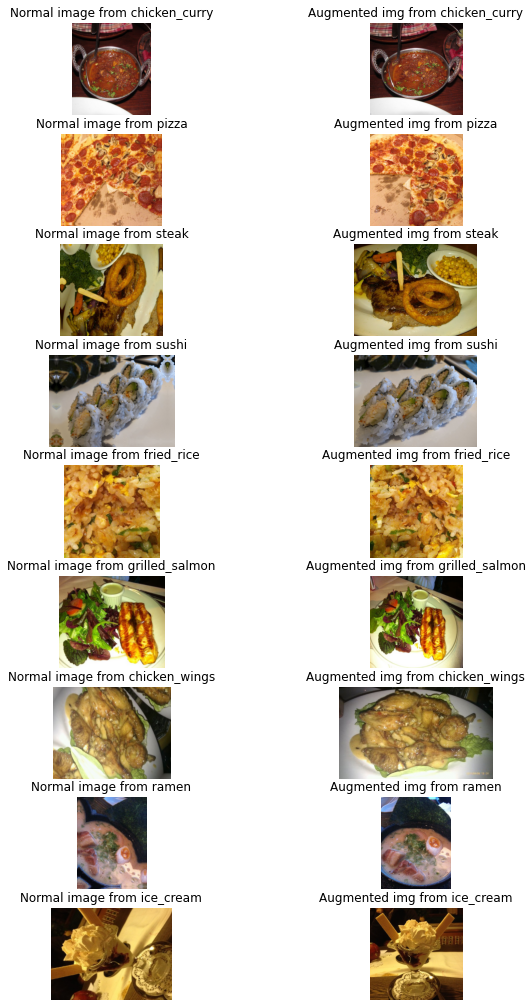

In [255]:
plot_pictures('/content/10_food_classes_1_percent/train', rows_num = 10)

In [256]:
model_4.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [257]:
model_4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling (Glob (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [258]:
#Fit model on 1% data only
history_4 = model_4.fit(train_data_1, epochs = 5, callbacks=[tf_board_1], steps_per_epoch=len(train_data_1),
            validation_data = test_data, validation_steps = int(0.25*len(test_data)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 1/5
3/3 [==============================] - 15s 4s/step - loss: 2.4477 - accuracy: 0.1000 - val_loss: 2.2424 - val_accuracy: 0.1612
Epoch 2/5
3/3 [==============================] - 3s 1s/step - loss: 2.1652 - accuracy: 0.1429 - val_loss: 2.1325 - val_accuracy: 0.2385
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 2.0371 - accuracy: 0.2571 - val_loss: 2.0212 - val_accuracy: 0.3322
Epoch 4/5
3/3 [==============================] - 3s 1s/step - loss: 1.8292 - accuracy: 0.4857 - val_loss: 1.9412 - val_accuracy: 0.3766
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6668 - accuracy: 0.6571 - val_loss: 1.8484 - val_accuracy: 0.4211


In [259]:
result_4 = model_4.evaluate(test_data)

79/79 [==============================] - 9s 114ms/step - loss: 1.8595 - accuracy: 0.4340


In [260]:
result_2, result_4

([0.6082653999328613, 0.8411999940872192],
 [1.8595054149627686, 0.4339999854564667])

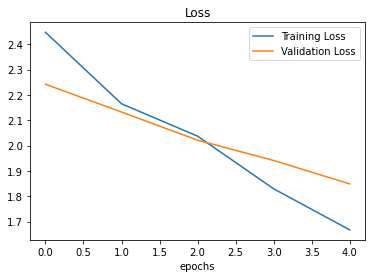

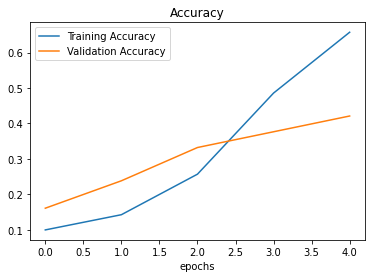

In [261]:
plot_loss_curves(history_4)

### Build model_5 same as model_4 
and fit it on 10% dataset to extract feature vector

In [262]:
K.clear_session()

In [263]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
aug_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation')
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
gap_layer = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_2d')
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')

In [264]:
x = aug_layer(inputs)
x = base_model(x)
#we can use this syntax x = base_model(x, training = False)
x = gap_layer(x)
outputs = outputs(x)
model_5 = tf.keras.Model(inputs, outputs)

In [265]:
# model_5 = tf.keras.models.clone_model(model_4)
# model_5.summary()
#Note: if i just clone the model it doesnt learn anything! Wondering why

In [266]:
model_5.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

### Create model checkpoint callback function
Callback to save the Keras model or model weights at some frequency.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint

The ModelCheckpoint callback gives you the ability to save your model, as a whole in the SavedModel format or the weights (patterns) only to a specified directory as it trains.

This is helpful if you think your model is going to be training for a long time and you want to make backups of it as it trains. It also means if you think your model could benefit from being trained for longer, you can reload it from a specific checkpoint and continue training from there.

For example, say you fit a feature extraction transfer learning model for 5 epochs and you check the training curves and see it was still improving and you want to see if fine-tuning for another 5 epochs could help, you can load the checkpoint, unfreeze some (or all) of the base model layers and then continue training.

In [267]:
#We save weights only
def create_checkpoint(model_num):
  """Returns checkpoint callback function, args: model number"""
  checkpoint_filepath = 'checkpoints/checkpoint_'+str(model_num)+'.ckpt'
  model_checkpoints = tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
                                                          save_weights_only=True, save_freq='epoch',
                                                          options=None)
  return model_checkpoints

In [268]:
model_checkpoints = create_checkpoint(5)

In [269]:
checkpoint_filepath_5 = 'checkpoints/checkpoint_5.ckpt'

In [270]:
history_5 = model_5.fit(train_data_10, epochs = 5, 
                        callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented'), model_checkpoints],
                        steps_per_epoch=len(train_data_10),
                        validation_data = test_data, 
                        validation_steps = int(0.25*len(test_data)))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented/20210621-095229
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 14s 375ms/step - loss: 1.9889 - accuracy: 0.3693 - val_loss: 1.4482 - val_accuracy: 0.6595

Epoch 00001: val_loss improved from inf to 1.44821, saving model to checkpoints/checkpoint_5.ckpt
Epoch 2/5
24/24 [==============================] - 6s 252ms/step - loss: 1.3712 - accuracy: 0.6627 - val_loss: 1.0500 - val_accuracy: 0.7730

Epoch 00002: val_loss improved from 1.44821 to 1.05003, saving model to checkpoints/checkpoint_5.ckpt
Epoch 3/5
24/24 [==============================] - 6s 254ms/step - loss: 1.0795 - accuracy: 0.7147 - val_loss: 0.8574 - val_accuracy: 0.8043

Epoch 00003: val_loss improved from 1.05003 to 0.85735, saving model to checkpoints/checkpoint_5.ckpt
Epoch 4/5
24/24 [==============================] - 7s 258ms/step - loss: 0.9366 - accuracy: 0.7600 - val_loss: 0.7311 - val_accuracy: 0.8257

Epoch 00004: val_loss improved from 0.85735 to 0.73106, saving model to checkpoints/checkpoint_5.ckpt
Epoch 5/5
24/24 [====================

In [271]:
result_5 = model_5.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.7135 - accuracy: 0.8080


In [272]:
result_2, result_5

([0.6082653999328613, 0.8411999940872192],
 [0.7135174870491028, 0.8080000281333923])

*Augmented data performs worse, but curves are going smooth in proper direction and we probably just need more training to improve result*





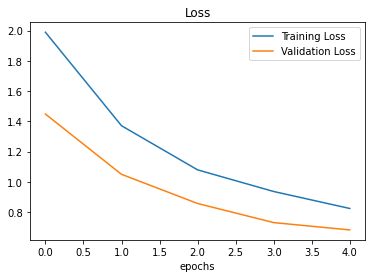

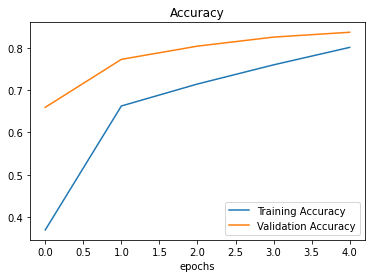

In [273]:
plot_loss_curves(history_5)

### Loading in checkpointed weights

We can keep training this model longer (another 5 epochs)

In [274]:
model_5.load_weights(checkpoint_filepath_5)

In [275]:
model_5.evaluate(test_data)
#same as model_5

79/79 [==============================] - 9s 105ms/step - loss: 0.7135 - accuracy: 0.8080


[0.7135173082351685, 0.8080000281333923]

In [276]:
history_5_2 = model_5.fit(train_data_10, epochs = 10,
                           initial_epoch = 5,
                            callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented'), 
                                     create_checkpoint(52)],
                            steps_per_epoch=len(train_data_10),
                            validation_data = test_data, 
                            validation_steps = int(.25*len(test_data)))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented/20210621-095336
Epoch 6/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 8s 300ms/step - loss: 0.7489 - accuracy: 0.8093 - val_loss: 0.6180 - val_accuracy: 0.8503

Epoch 00006: val_loss improved from inf to 0.61796, saving model to checkpoints/checkpoint_52.ckpt
Epoch 7/10
24/24 [==============================] - 7s 295ms/step - loss: 0.6764 - accuracy: 0.8333 - val_loss: 0.6023 - val_accuracy: 0.8388

Epoch 00007: val_loss improved from 0.61796 to 0.60230, saving model to checkpoints/checkpoint_52.ckpt
Epoch 8/10
24/24 [==============================] - 7s 256ms/step - loss: 0.6621 - accuracy: 0.8160 - val_loss: 0.5517 - val_accuracy: 0.8438

Epoch 00008: val_loss improved from 0.60230 to 0.55172, saving model to checkpoints/checkpoint_52.ckpt
Epoch 9/10
24/24 [==============================] - 6s 250ms/step - loss: 0.6209 - accuracy: 0.8293 - val_loss: 0.5738 - val_accuracy: 0.8438

Epoch 00009: val_loss did not improve from 0.55172
Epoch 10/10
24/24 [==============================] - 6s 224ms/step - loss: 0.5801 -

In [277]:
result_5_2 = model_5.evaluate(test_data)

79/79 [==============================] - 9s 104ms/step - loss: 0.5693 - accuracy: 0.8280


In [278]:
result_5_2, result_5
#2.5% improvement

([0.5692719221115112, 0.828000009059906],
 [0.7135174870491028, 0.8080000281333923])

In [279]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
10
[0.36933332681655884, 0.6626666784286499, 0.7146666646003723, 0.7599999904632568, 0.8013333082199097, 0.809333324432373, 0.8333333134651184, 0.8159999847412109, 0.8293333053588867, 0.8560000061988831]


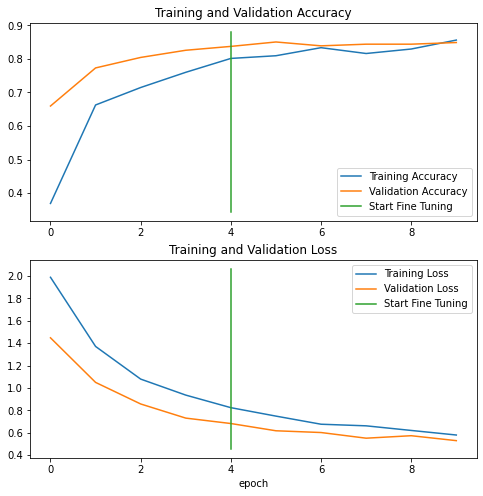

In [280]:
compare_historys(history_5, history_5_2, initial_epochs=5)

### Try same model as model_5 and train it for 10 epochs(compare to previous results)

In [281]:
K.clear_session()

In [282]:
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
aug_layer = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
                                          tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
                                          tf.keras.layers.experimental.preprocessing.RandomWidth(0.2), ],
                                          name = 'data_augmentation'                                    
)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
gap_layer = tf.keras.layers.GlobalAveragePooling2D(name = 'global_max_pooling_2d')
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')

In [283]:
x = aug_layer(inputs)
x = base_model(x)
#we can use this syntax x = base_model(x, training = False)
x = gap_layer(x)
outputs = outputs(x)
model_6 = tf.keras.Model(inputs, outputs)

In [284]:
model_6.compile(optimizer='adam', metrics=['accuracy'], loss = 'categorical_crossentropy')

In [285]:
history_6 = model_6.fit(train_data_10, epochs = 10, 
                        callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented_10_epochs')],
                        steps_per_epoch=len(train_data_10),
                        validation_data = test_data, 
                        validation_steps = len(test_data))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented_10_epochs/20210621-095424
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 20s 648ms/step - loss: 2.0036 - accuracy: 0.3347 - val_loss: 1.4966 - val_accuracy: 0.6368
Epoch 2/10
24/24 [==============================] - 13s 524ms/step - loss: 1.3859 - accuracy: 0.6653 - val_loss: 1.0756 - val_accuracy: 0.7464
Epoch 3/10
24/24 [==============================] - 12s 507ms/step - loss: 1.1003 - accuracy: 0.7373 - val_loss: 0.8765 - val_accuracy: 0.7896
Epoch 4/10
24/24 [==============================] - 12s 496ms/step - loss: 0.9525 - accuracy: 0.7640 - val_loss: 0.7673 - val_accuracy: 0.7996
Epoch 5/10
24/24 [==============================] - 12s 507ms/step - loss: 0.8303 - accuracy: 0.7893 - val_loss: 0.7047 - val_accuracy: 0.8128
Epoch 6/10
24/24 [==============================] - 12s 486ms/step - loss: 0.7372 - accuracy: 0.8173 - val_loss: 0.6568 - val_accuracy: 0.8240
Epoch 7/10
24/24 [==============================] - 13s 526ms/step - loss: 0.7082 - accuracy: 0.8173 - val_loss: 0.6277 - val_accuracy: 0.8248
Epoch 8/10

In [286]:
result_6 = model_6.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.5637 - accuracy: 0.8352


In [287]:
result_6, result_5_2
#Results are not same

([0.5636910796165466, 0.8352000117301941],
 [0.5692719221115112, 0.828000009059906])

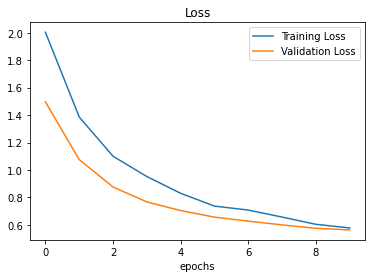

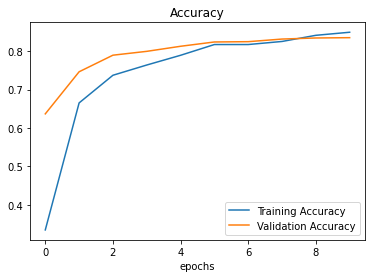

In [288]:
plot_loss_curves(history_6)

### Model 5: Fine-tuning an existing model on 10% of the data

So far our saved model_5 has been trained using feature extraction transfer learning for 5 epochs on 10% of the training data and data augmentation.
This means all of the layers in the base model (EfficientNetB0) were frozen during training.

For our next experiment we're going to switch to fine-tuning transfer learning. This means we'll be using the same base model except we'll be unfreezing some of its layers (ones closest to the top) and running the model for a few more epochs.

The idea with fine-tuning is to start customizing the pre-trained model more to our own data.

In [289]:
#Build next from saved weights model 5 
model_5.load_weights(checkpoint_filepath_5)

In [290]:
model_5.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.7135 - accuracy: 0.8080


[0.713517427444458, 0.8080000281333923]

In [291]:
model_5.layers

In [292]:
for layer in model_5.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc390044b90> True
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc3900a1090> True
<tensorflow.python.keras.engine.functional.Functional object at 0x7fc48db79210> False
<tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7fc3900a11d0> True
<tensorflow.python.keras.layers.core.Dense object at 0x7fc300d84ad0> True


In [293]:
i=1
for layer in model_5.layers[2].layers:
  print(i, layer.name, layer.trainable)
  i+=1

1 input_1 False
2 rescaling False
3 normalization False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39 block2b_se_reshape 

In [294]:
#Make top 10 layers trainable
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

###We should lower learning rate(10x usual practice), so weights dont change too much 
and recompile the model

In [295]:
#Recompile model_5

model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'], loss = 'categorical_crossentropy')

In [296]:
#Check layers again
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_reshape F

In [297]:
#Fine tune for another 5 epochs
history_5_fine_tune = model_5.fit(train_data_10, epochs = 10, #initial_epoch = 5 plus new epochs = 5
                                  initial_epoch = history_5.epoch[-1],
                                  callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '10%_data_augmented_fine_tuned')],
                                  steps_per_epoch=len(train_data_10),
                                  validation_data = test_data, 
                                  validation_steps = int(0.25*len(test_data)))

Saving TensorBoard log files to food_classification_efficientNetB0/10%_data_augmented_fine_tuned/20210621-095754
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 14s 308ms/step - loss: 0.7566 - accuracy: 0.8040 - val_loss: 0.6550 - val_accuracy: 0.8372
Epoch 6/10
24/24 [==============================] - 5s 208ms/step - loss: 0.7808 - accuracy: 0.7947 - val_loss: 0.6697 - val_accuracy: 0.8388
Epoch 7/10
24/24 [==============================] - 5s 210ms/step - loss: 0.7585 - accuracy: 0.8147 - val_loss: 0.6726 - val_accuracy: 0.8339
Epoch 8/10
24/24 [==============================] - 5s 206ms/step - loss: 0.7494 - accuracy: 0.8133 - val_loss: 0.6585 - val_accuracy: 0.8257
Epoch 9/10
24/24 [==============================] - 5s 211ms/step - loss: 0.7450 - accuracy: 0.8160 - val_loss: 0.6320 - val_accuracy: 0.8520
Epoch 10/10
24/24 [==============================] - 7s 265ms/step - loss: 0.7407 - accuracy: 0.8093 - val_loss: 0.6494 - val_accuracy: 0.8273


In [298]:
result_7 = model_5.evaluate(test_data)

79/79 [==============================] - 9s 106ms/step - loss: 0.6758 - accuracy: 0.8124


In [299]:
result_7, result_5_2, result_5
#we didnt improve, so we can try with more data

([0.6758161187171936, 0.8123999834060669],
 [0.5692719221115112, 0.828000009059906],
 [0.7135174870491028, 0.8080000281333923])

5
11
[0.36933332681655884, 0.6626666784286499, 0.7146666646003723, 0.7599999904632568, 0.8013333082199097, 0.8040000200271606, 0.7946666479110718, 0.8146666884422302, 0.8133333325386047, 0.8159999847412109, 0.809333324432373]


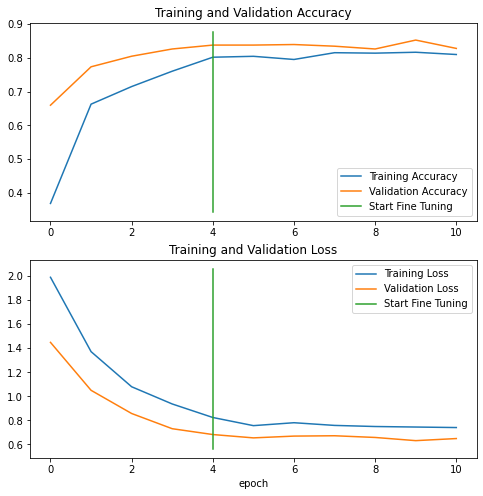

In [300]:
compare_historys(history_5, history_5_fine_tune)

### Lets repeat model_5 with all data (100%)


In [301]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_file("10_food_classes_all_data.zip")

# Setup data directories
train_dir_100 = "/content/10_food_classes_all_data/train"

--2021-06-21 09:59:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.137.128, 142.251.2.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.137.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   221MB/s    in 2.2s    

2021-06-21 09:59:07 (221 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [302]:
train_data_100 = tf.keras.preprocessing.image_dataset_from_directory(train_dir_100,
                                                                      label_mode="categorical",
                                                                      image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.


In [303]:
K.clear_session()

In [304]:
model_5.load_weights(checkpoint_filepath_5)


In [305]:
#Make top 10 layers trainable
base_model.trainable = True
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [306]:
#Recompile model_5 with lower learning rate
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics=['accuracy'], loss = 'categorical_crossentropy')

In [307]:
history_5_fine_tune_100 = model_5.fit(train_data_100, epochs = 10, #initial_epoch = 5 plus new epochs = 5
                                  initial_epoch = history_5.epoch[-1],
                                  callbacks = [create_tf_board_callback('food_classification_efficientNetB0', '100%_data_augmented_fine_tuned')],
                                  steps_per_epoch=len(train_data_100),
                                  validation_data = test_data, 
                                  validation_steps = int(0.25*len(test_data)))

Saving TensorBoard log files to food_classification_efficientNetB0/100%_data_augmented_fine_tuned/20210621-095924
Epoch 5/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


235/235 [==============================] - 49s 184ms/step - loss: 0.9166 - accuracy: 0.7248 - val_loss: 0.5987 - val_accuracy: 0.8536
Epoch 6/10
235/235 [==============================] - 39s 166ms/step - loss: 0.8650 - accuracy: 0.7443 - val_loss: 0.5425 - val_accuracy: 0.8586
Epoch 7/10
235/235 [==============================] - 39s 164ms/step - loss: 0.8313 - accuracy: 0.7497 - val_loss: 0.5367 - val_accuracy: 0.8536
Epoch 8/10
235/235 [==============================] - 38s 158ms/step - loss: 0.7961 - accuracy: 0.7545 - val_loss: 0.4718 - val_accuracy: 0.8684
Epoch 9/10
235/235 [==============================] - 38s 158ms/step - loss: 0.7647 - accuracy: 0.7689 - val_loss: 0.4834 - val_accuracy: 0.8668
Epoch 10/10
235/235 [==============================] - 37s 156ms/step - loss: 0.7402 - accuracy: 0.7719 - val_loss: 0.4600 - val_accuracy: 0.8635


### Notebook collapsed!
I dont have GPU, I will rerun this notebook again when i get access to GPU.
The results should show over 90% accuracy.


In [308]:
result_8 = model_5.evaluate(test_data)

79/79 [==============================] - 9s 113ms/step - loss: 0.5053 - accuracy: 0.8400


In [309]:
result_8, result_7, result_5_2, result_5

([0.5052745342254639, 0.8399999737739563],
 [0.6758161187171936, 0.8123999834060669],
 [0.5692719221115112, 0.828000009059906],
 [0.7135174870491028, 0.8080000281333923])

5
11
[0.36933332681655884, 0.6626666784286499, 0.7146666646003723, 0.7599999904632568, 0.8013333082199097, 0.7247999906539917, 0.7442666888237, 0.7497333288192749, 0.7545333504676819, 0.7689333558082581, 0.7718666791915894]


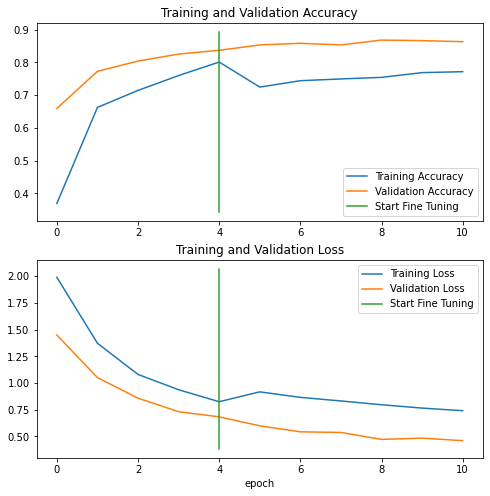

In [310]:
compare_historys(history_5, history_5_fine_tune_100)

###Check results on tensorboard

In [ ]:
!tensorboard dev upload --logdir ./food_classification_efficientNetB0/ --name "EfficientNetB0 fine tuned" --description "Comparing normal and fine tuned models on 1%, 10% and 100% data" --one_shot

Done. View your TensorBoard at https://tensorboard.dev/experiment/S8YrrPtkTA2mHkiPReLx4g/

### Predict on all test data

In [312]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_data_ = test_datagen.flow_from_directory('/content/10_food_classes_all_data/test',
                                             target_size=(224, 224),
                                             class_mode = 'categorical',
                                             batch_size = 2500)

Found 2500 images belonging to 10 classes.


In [ ]:
preds_ = model_5.predict(test_data_[0][0])

In [ ]:
preds_ = np.array(tf.argmax(preds_, axis = 1))

In [ ]:
preds_

In [ ]:
y_test_ = np.array(tf.argmax(test_data_[0][1], axis = 1))

### Plot confusion matrix

In [ ]:
plot_confusion_matrix(y_test_, preds_, figsize = (15,15), classes = list(classes_names))

### Plot predictions

In [ ]:
from random import randrange
num_img = 9
y = test_data_[0][1]
X = test_data_[0][0]
labels = classes_names
fig, ax = plt.subplots(figsize=(10,15))
for i in range(num_img):
    plt.subplot(num_img/3, num_img/3, i+1)
    random_index = randrange(len(test_data_[0][0]))
    prob = model_5.predict(X[random_index][tf.newaxis, ...])
    pred = tf.argmax(prob, axis = 1)
    print(pred)
    if y[random_index] == pred:
      color = 'green'
    else:
      color = 'red'
    plt.imshow(X[random_index], cmap = plt.cm.binary)
    # plt.title(f"Real: {labels[y[random_index]]} \n Predicted:{labels[int(pred)]} \n {tf.reduce_max(prob)*100:2.0f}% ", color = color)


In [ ]:
from random import randrange
def show_pred(num_img = 3, X = test_data_[0][0], y = test_data_[0][1], labels = classes_names, model = model_5, figsize = (10,15)):
  #Plot 
  fig, ax = plt.subplots(figsize=figsize)
  # Choose indexes
  for i in range(num_img):
    plt.subplot(num_img/3, num_img/3, i+1)
    random_index = randrange(len(X))
    prob = model.predict(X[random_index][tf.newaxis, ...])
    pred = tf.argmax(prob, axis = 1)
    if y[random_index] == pred:
      color = 'green'
    else:
      color = 'red'
    plt.imshow(X[random_index], cmap = plt.cm.binary)
    plt.title(f"Real: {labels[y[random_index]]} \n Predicted:{labels[int(pred)]} \n {tf.reduce_max(prob)*100:2.0f}% ", color = color)


In [ ]:
show_pred()

In [ ]:
!nvidia-smi